In [2]:
#from statsmodels.tsa.arima_process import ArmaProcess 
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from pandas import Series
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import eye, asarray, dot, sum, diag
from scipy.linalg import svd
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict
from netCDF4 import Dataset
from numpy import linspace
from numpy import meshgrid
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import grangercausalitytests

import PCA_functions as pf
import Extreme_functions as ef

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, CMIknn
import tigramite.data_processing as pp


from sklearn.cluster import AgglomerativeClustering, DBSCAN

from statsmodels.tsa.stattools import adfuller
from Data import Data
from datetime import datetime

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import itertools
from collections import Counter
import pickle

from numpy import linalg as LA

import matplotlib.cm as cm

from scipy.special import inv_boxcox
from scipy import stats

from matplotlib import animation



import reverse_geocoder as rg

from pandas_datareader import wb
import scipy.stats as st

import Rung as rung

plt.rcParams["figure.figsize"] = (5,5)

from pandas_datareader import wb

import seaborn as sns

from sklearn import preprocessing


import feature_finder_keiko as ff
import feature_finder_f as ff1
from statsmodels.tsa.stattools import adfuller

plt.rcParams["figure.figsize"] = (20,10)

from scipy import linalg
import scipy.stats as st

In [4]:
step = 1
train_start = np.arange(1948,1977,step)
#train_end = np.arange(1955,2006,step)
validation_end = np.arange(1982,2011,step)
test_start = np.arange(1983,2012,step)
test_end = np.arange(1987,2016,step)

In [16]:
f = 12
n_components_sst = np.load("sst_number.npy")
level = 99
model_type = 'pcmci'
extremes_treshold = -1

In [69]:
ijz = -2
tau = 3

In [70]:
link_corr = np.load("../../whole_data_results/ET_orac/best_link_1/corr_{}_{}_{}_{}_{}.npy".format(f,train_start[ijz],validation_end[ijz],tau,n_components_sst[ijz]))
link_pcmci = np.load("../../whole_data_results/ET_orac/best_link_1/pcmci_{}_{}_{}_{}_{}.npy".format(f,train_start[ijz],validation_end[ijz],tau,n_components_sst[ijz]))

In [71]:
link_corr[:,0]

array([49, 15, 55,  5,  4, 15, 18, 34, 52])

In [72]:
link_pcmci[:,0]

array([ 7, 24,  5, 54, 35, 22, 18, 51])

In [34]:
def plot_constructor(ijz,tau, model_type, extremes_treshold = -1, f = 12):
    lon1_sst = np.arange(-180,180,2)
    
    
    step = 1
    train_start = np.arange(1948,1977,step)
    validation_end = np.arange(1982,2011,step)
    test_start = np.arange(1983,2012,step)
    test_end = np.arange(1987,2016,step)
    
    n_components_sst = np.load("sst_number.npy")
    
    temporal_limits = {"time_min":datetime(train_start[ijz], 1, 1, 0, 0),"time_max":datetime(validation_end[ijz], 12, 1, 0, 0)}
    data_sst, ts, V, df_sst, lon_sst, lat_sst = ff.PCA_computer_rotated_locs('../../../nc/sst.mnmean.nc', "sst",temporal_limits, n_components_sst[ijz], -9.96921e+36)
    
    link = np.load("../../whole_data_results/ET_orac/best_link_{}/{}_{}_{}_{}_{}_{}.npy".format(abs(extremes_treshold),model_type,f,train_start[ijz],validation_end[ijz],tau,n_components_sst[ijz]))
    
    deg_result = np.zeros((len(lat_sst),len(lon1_sst)))
    comps = link[:,0]

    lat_number = len(lat_sst)
    lon_number = len(lon1_sst)

    for comp in set(comps):
        deg = np.zeros((len(lat_sst),len(lon1_sst)))
        df_sst["pc"] = V[:,comp-1]
        for i in range(lat_number):
            for j in range(lon_number):
                if not df_sst[(df_sst.lats == lat_sst[i]) & (df_sst.lons == lon1_sst[j])].pc.values.size == 0:
                    deg[i,j] = df_sst[(df_sst.lats == lat_sst[i]) & (df_sst.lons == lon1_sst[j])].pc.values
                else:
                    deg[i,j]=np.nan


        if np.abs(np.nanmin(deg)) > np.abs(np.nanmax(deg)):
            limit = np.nanpercentile(deg, 1 - level)
            deg[deg>=limit]=0
            deg[deg<limit]=1
        else:
            limit = np.nanpercentile(deg, level)
            deg[deg<=limit]=0
            deg[deg>limit]=1
        
        deg_result = deg_result + deg
        
    return(deg_result)

In [35]:
deg = plot_constructor(-1,12,'pcmci')

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


Text(0.5, 1.0, 'PCMCI, lag of 12')

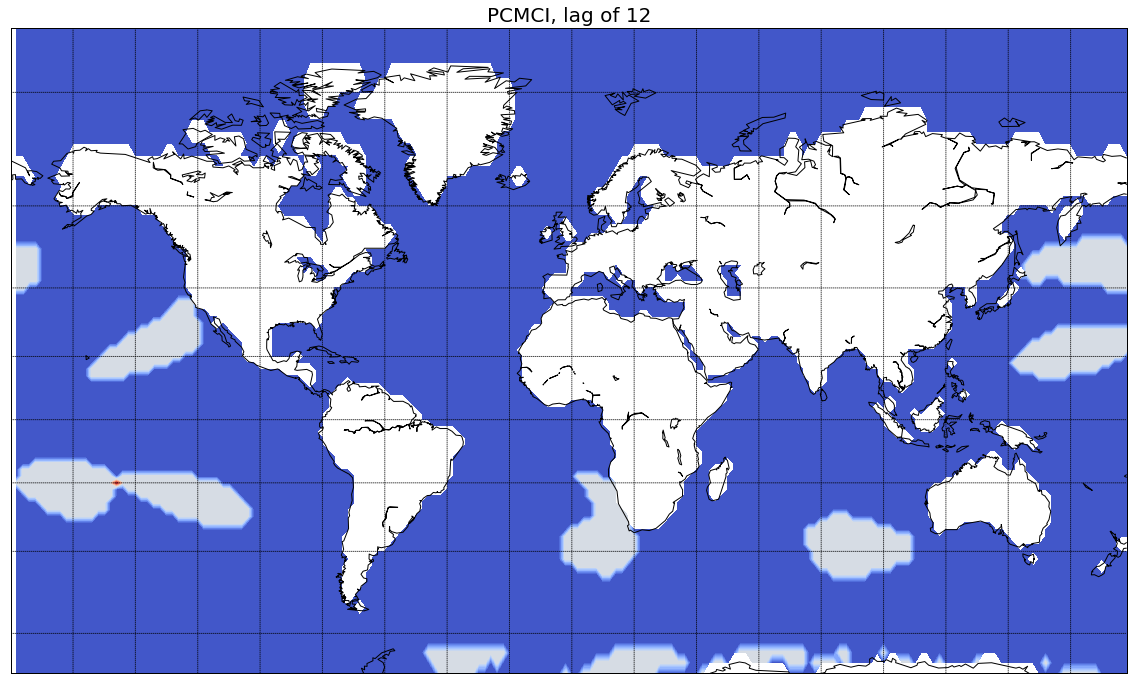

In [36]:
#deg_result[deg_result > 0] = 1

lon  = lon1_sst
lat = lat_sst
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1_sst.min(), \
  urcrnrlon=lon1_sst.max(),llcrnrlat=lat_sst.min()+20,urcrnrlat=lat_sst.max(), \
  resolution='c')

#m = Basemap(projection='robin',lon_0=0,resolution='c')

lon2, lat2 = np.meshgrid(lon,lat)
x, y = m(lon2, lat2)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
cs = m.contourf(x,y,deg,20,cmap=plt.cm.get_cmap('coolwarm'))
plt.title('PCMCI, lag of {}'.format(tau),fontsize=20)
#cbar.ax.tick_params(labelsize=25)
#plt.colorbar();
#plt.savefig("EOF{}.png".format(pc))
#plt.savefig("./areas/{}_PCMCI_{}.png".format(cc,tau))

In [37]:
deg_corr = plot_constructor(-1,12,'corr')

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


Text(0.5, 1.0, 'PCMCI, lag of 12')

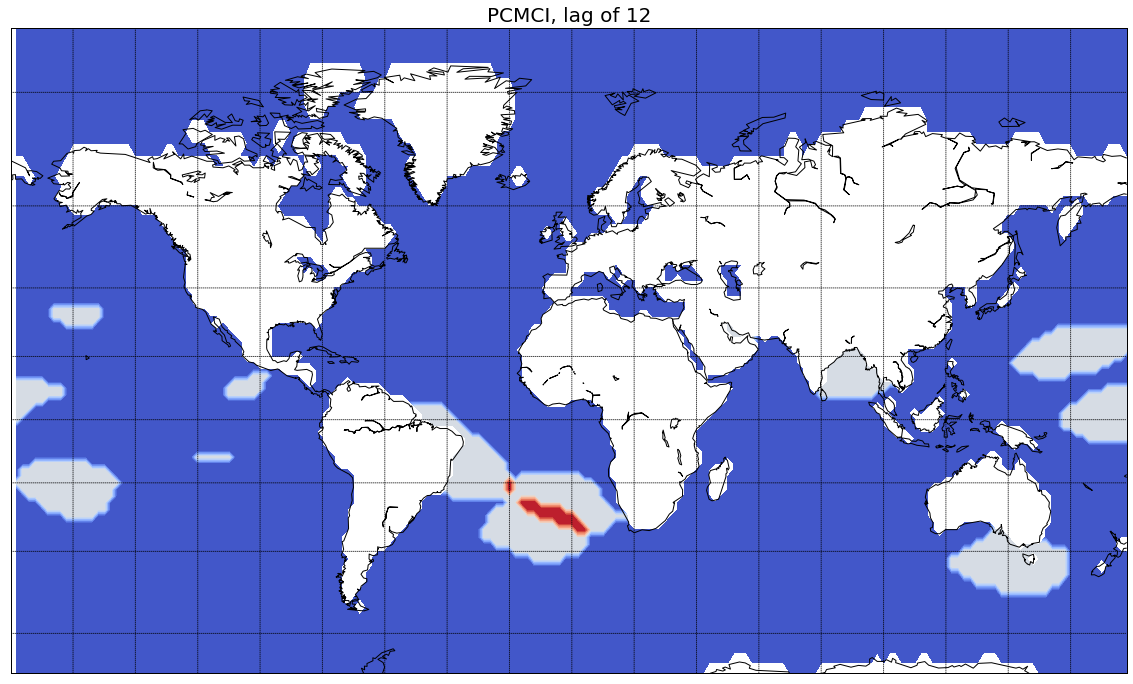

In [38]:
#deg_result[deg_result > 0] = 1

lon  = lon1_sst
lat = lat_sst
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1_sst.min(), \
  urcrnrlon=lon1_sst.max(),llcrnrlat=lat_sst.min()+20,urcrnrlat=lat_sst.max(), \
  resolution='c')

#m = Basemap(projection='robin',lon_0=0,resolution='c')

lon2, lat2 = np.meshgrid(lon,lat)
x, y = m(lon2, lat2)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
cs = m.contourf(x,y,deg_corr,20,cmap=plt.cm.get_cmap('coolwarm'))
plt.title('PCMCI, lag of {}'.format(tau),fontsize=20)
#cbar.ax.tick_params(labelsize=25)
#plt.colorbar();
#plt.savefig("EOF{}.png".format(pc))
#plt.savefig("./areas/{}_PCMCI_{}.png".format(cc,tau))

In [ ]:





for tau in taus:
    deg_result = np.zeros((len(lat_sst),len(lon1_sst)))
    for ijz in range(len(train_start)):

        if len(link) == 0 : continue
        comps = link[:,0]

        lat_number = len(lat_sst)
        lon_number = len(lon1_sst)

        for comp in set(comps):
            deg = np.zeros((len(lat_sst),len(lon1_sst)))
            df_sst["pc"] = V[:,comp-1]
            for i in range(lat_number):
                for j in range(lon_number):
                    if not df_sst[(df_sst.lats == lat_sst[i]) & (df_sst.lons == lon1_sst[j])].pc.values.size == 0:
                        deg[i,j] = df_sst[(df_sst.lats == lat_sst[i]) & (df_sst.lons == lon1_sst[j])].pc.values
                    else:
                        deg[i,j]=np.nan


            if np.abs(np.nanmin(deg)) > np.abs(np.nanmax(deg)):
                limit = np.nanpercentile(deg, 1 - level)
                deg[deg>=limit]=0
                deg[deg<limit]=1
            else:
                limit = np.nanpercentile(deg, level)
                deg[deg<=limit]=0
                deg[deg>limit]=1

            deg_result = deg_result + deg

    np.save("./areas_{}/{}_{}_{}_{}_{}_{}.npy".format(abs(extremes_treshold),model_type,f,step,test_start[0],test_end[-1],tau),deg_result)


In [14]:
link_corr

array([[ 21, -14],
       [  2, -16],
       [ 55, -17],
       [ 25, -21],
       [ 51, -13],
       [ 34, -20],
       [ 19, -16],
       [ 42, -22]])

In [15]:
link_pcmci

array([[ 52, -19],
       [ 23, -16],
       [  8, -18],
       [ 25, -23],
       [ 47, -14],
       [ 43, -14],
       [ 42, -23],
       [ 43, -13],
       [ 16, -16]])